### The model

$u(c) = log(c)$ utility function    
$y = 1$ Deterministic income    
$p(r = 0.02) = 0.5$   
$p(r = -0.01) = 0.5$ 

In [1]:
# infinite horizon MDP problem
%pylab inline
import numpy as np
from scipy.optimize import minimize
import scipy.optimize as optimization
import warnings
warnings.filterwarnings("ignore")

# discounting factor 
beta = 0.95
# wealth level
eps = 0.001
w_low = eps
w_high = 10
# interest rate
r_up = 0.02
r_down = 0.01
# deterministic income
y = 1
# good state and bad state economy with equal probability 0.5
# with good investment return 0.02 or bad investment return -0.01
ws = np.linspace(w_low, w_high**(0.5),100)**2
Vs = np.zeros(100)
Cs = np.zeros(100)

def u(c):
    return np.log(c)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Value iteration
for j in range(100):
    if j % 10 == 0:
        print(j)
    for i in range(len(ws)):
        w = ws[i]
        def obj(c):
            return -(u(c) + beta*(np.interp((y+w-c)*(1+r_up), ws, Vs) + np.interp((y+w-c)*(1-r_down), ws, Vs))/2)
        bounds = [(eps, y+w-eps)]
        res = minimize(obj, eps, method='SLSQP', bounds=bounds)
        Cs[i] = res.x[0]
        Vs[i] = -res.fun

0
10
20
30
40
50
60
70
80
90


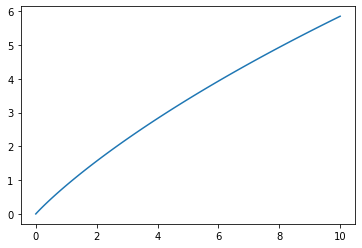

In [3]:
plt.plot(ws,Vs)

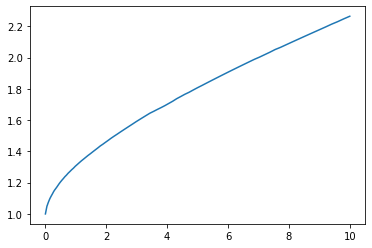

In [4]:
plt.plot(ws,Cs)

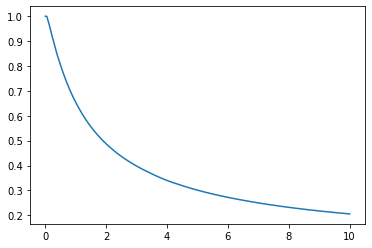

In [5]:
plt.plot(ws,Cs/(ws+y))

### policy gradient
Assume the policy form $\theta = (a,b, \sigma = 0.1)$, then $\pi_\theta$ ~ Beta($\alpha$, $\beta$)


Assume the initial value $a_1 = 0$, $b_1 = 0$, $c_1 = 0$, $d_1 = 0$, $a_2 = 0$, $b_2 = 0$, $c_2 = 0$, $d_2 = 0$:
$$\alpha = log(1+ e^{a_1 x^3 + b_1 x^2 + c_1 x + d_1}) + 1 $$
$$\beta = log(1+ e^{a_2 x^3 + b_2 x^2 + c_2 x + d_2}) + 1 $$


$$\theta_{k+1} = \theta_{k} + \alpha  \nabla_\theta V(\pi_\theta)|\theta_k$$

In [35]:
# T = 100
# def poly(the, w):
#     return the[0]*(w**3) + the[1]*(w**2) +the[2]*w + the[3]

# # simulation step T = 100
# def a(theta, w):
#     value = np.log(1+np.exp(poly(theta[:4],w))) + 1
#     if isscalar(value):
#         return max(min(value, 100),1)
#     else:
#         np.clip(value, 1, 100, out=value)
#         return value

# def b(theta, w):
#     value = np.log(1+np.exp(poly(theta[4:],w))) + 1
#     if isscalar(value):
#         return max(min(value, 100),1)
#     else:
#         np.clip(value, 1, 100, out=value)
#         return value


# def simSinglePath(theta):
#     wPath = np.zeros(T)
#     aPath = np.zeros(T)
#     rPath = np.zeros(T)
#     w = np.random.uniform(w_low, w_high)
#     for t in range(T):
#         n = np.random.beta(a(theta, w), b(theta, w))
#         n = max(min(n,1-eps),eps)
#         c = n*(w+y)
#         wPath[t] = w
#         aPath[t] = n
#         rPath[t] = u(c)*(beta**t)
#         if np.random.uniform(0,1) > 0.5:
#             w = (w+y-c) * (1+r_up)
#         else:
#             w = (w+y-c) * (1-r_down)
#     return wPath, aPath, rPath

# def gradientV(theta, D = 1000):
#     '''
#         D is the sample size
#     '''
#     notValid = True
#     while notValid:
#         grad = np.zeros(len(theta))
#         newGrad = np.zeros(len(theta))
#         for d in range(D):
#             wp, ap, rp = simSinglePath(theta)
#             togoR = np.cumsum(rp[::-1])[::-1]
#             newGrad[0] = np.dot(np.log(ap)*(wp**3)/(1+np.exp(-poly(theta[:4],wp))), togoR)
#             newGrad[1] = np.dot(np.log(ap)*(wp**2)/(1+np.exp(-poly(theta[:4],wp))), togoR)
#             newGrad[2] = np.dot(np.log(ap)*(wp)/(1+np.exp(-poly(theta[:4],wp))), togoR)
#             newGrad[3] = np.dot(np.log(ap)*(1)/(1+np.exp(-poly(theta[:4],wp))), togoR)          
            
#             newGrad[4] = np.dot(np.log(1-ap)*(wp**3)/(1+np.exp(-poly(theta[4:],wp))), togoR)
#             newGrad[5] = np.dot(np.log(1-ap)*(wp**2)/(1+np.exp(-poly(theta[4:],wp))), togoR)
#             newGrad[6] = np.dot(np.log(1-ap)*(wp)/(1+np.exp(-poly(theta[4:],wp))), togoR)
#             newGrad[7] = np.dot(np.log(1-ap)*(1)/(1+np.exp(-poly(theta[4:],wp))), togoR)
                  
#             grad += newGrad
#         grad /= D
#         if numpy.isnan(grad).any() == False:
#             notValid = False
#     return grad

# def updateTheta(theta):
#     theta = theta + alpha * gradientV(theta)
#     return theta

# def plot(theta):
#     plt.plot(ws, Cs, 'b')
#     plt.plot(ws, a(theta,ws)/(a(theta,ws) + b(theta,ws))*(ws+y), 'r')

0
[0, 0, 0, 0, 0, 0, 0, 0]
1
[0.01501555 0.00589801 0.00351782 0.00331654 0.0227919  0.00671703
 0.00346748 0.00311061]
2
[0.02368948 0.01188952 0.00723505 0.00663018 0.03687128 0.01303806
 0.00704623 0.00619039]
3
[0.03193768 0.01800496 0.01104709 0.00998415 0.04828265 0.01910806
 0.01066532 0.00934273]
4
[0.03975826 0.02428697 0.01496127 0.013346   0.0596692  0.02524583
 0.01430164 0.01244416]
5
[0.03912419 0.02944043 0.01871244 0.01667731 0.06558569 0.03069023
 0.01787369 0.01556049]
6
[0.0424693  0.03559296 0.02276163 0.02009882 0.07442466 0.03674546
 0.02159484 0.01869493]
7
[0.03903785 0.04080116 0.02662935 0.02342379 0.07944661 0.04207387
 0.02512342 0.02171834]
8
[0.0293512  0.04556866 0.03051202 0.02672595 0.08248061 0.04716989
 0.02860938 0.02470295]
9
[0.00891499 0.04932265 0.03429439 0.02994919 0.08565525 0.05216364
 0.03200176 0.02758896]
10
[-0.17458618  0.03577736  0.03608284  0.03252256  0.08066837  0.05558362
  0.03469857  0.02986897]
11
[-0.16662495  0.04013283  0.038

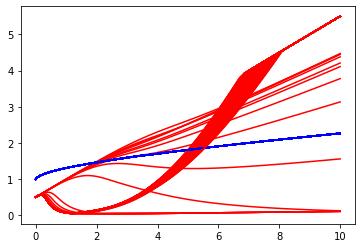

In [37]:
# # initial theta
# N = 100
# theta = [0]*8
# # gradient ascend step size 
# alpha = 0.0001
# # store theta
# THETA = np.zeros((len(theta),N))
# for i in range(N):
#     if i%1 ==0:
#         print(i)
#         print(theta)
#     theta = updateTheta(theta)
#     THETA[:,i] = theta
#     plot(theta)

approximate theta:  [0.83381087 0.5263778  1.72872177 0.60162327]


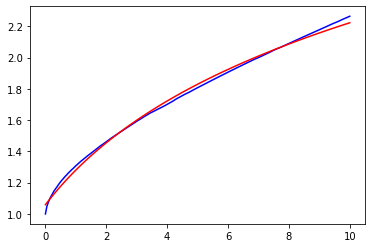

In [8]:
def func(x, a, b, c, d):
    return a * np.log(b*x+c) + d

theta, cov = optimization.curve_fit(func, ws, Cs)

def fun(x, theta):
    a,b,c,d = theta
    return func(x,a,b,c,d)
plt.plot(ws, Cs, 'b')
plt.plot(ws, fun(ws,theta), 'r')

print("approximate theta: ", theta)

In [44]:
T = 100
sigma = 0.2

def mu(w, theta):
    a,b,c,d = theta
    return a * np.log(b*w+c) + d


def simSinglePath(theta):
    wPath = np.zeros(T)
    aPath = np.zeros(T)
    rPath = np.zeros(T)
    w = np.random.uniform(w_low, w_high)
    for t in range(T):
        c = np.random.normal(mu(w, theta), sigma)
        c = max(min(c,w+y-eps),eps)
        wPath[t] = w
        aPath[t] = c
        rPath[t] = u(c)*(beta**t)
        if np.random.uniform(0,1) > 0.5:
            w = (w+y-c) * (1+r_up)
        else:
            w = (w+y-c) * (1-r_down)
    return wPath, aPath, rPath

def gradientV(theta, D = 10000):
    '''
        D is the sample size
    '''
    notValid = True
    while notValid:
        grad = np.zeros(len(theta))
        newGrad = np.zeros(len(theta))
        w = np.random.uniform(w_low, w_high)
        for d in range(D):
            wp, ap, rp = simSinglePath(theta)
            togoR = np.cumsum(rp[::-1])[::-1]
            newGrad[0] = np.dot((ap-mu(wp,theta)/(sigma**2))*np.log(theta[1]*wp+theta[2]), togoR)
            newGrad[1] = np.dot((ap-mu(wp,theta)/(sigma**2))*(theta[0]*wp)/(theta[1]*wp+theta[2]), togoR)
            newGrad[2] = np.dot((ap-mu(wp,theta)/(sigma**2))*theta[0]/(theta[1]*wp+theta[2]), togoR)
            newGrad[3] = np.dot((ap-mu(wp,theta)/(sigma**2))*1, togoR)            
            grad += newGrad
        grad /= D
        if numpy.isnan(grad).any() == False:
            notValid = False
    return grad

def V(theta,w):
    value = 0
    D = 1000
    for d in range(D):
        _, _, rp = simSinglePath(theta)
        value += np.sum(rp)
    value /= D
    return value

def updateTheta(theta):
    theta = theta + alpha * gradientV(theta)
    return theta

def plot(theta):
    plt.plot(ws, Cs, 'b')
    plt.plot(ws, mu(ws,theta), 'r')

0
[1, 1, 1, 1]
1
[0.92932344 0.96803546 1.0029881  0.97102356]
2
[0.85675575 0.93634725 1.00618421 0.9414648 ]
3
[0.78325286 0.90553729 1.00928626 0.91143572]
4
[0.71040609 0.8764858  1.01203901 0.88139575]
5
[0.63616985 0.84862677 1.01402741 0.84985645]
6
[0.56053636 0.82227484 1.0148823  0.81606661]
7
[0.48349713 0.79773152 1.01432368 0.77905156]
8
[0.40491595 0.77536172 1.01252324 0.73836606]
9
[0.32732936 0.75631102 1.01025813 0.69622235]
10
[0.25833762 0.74254048 1.00867417 0.65951613]
11
[0.22006511 0.73713042 1.00876895 0.64433604]
12
[0.21873308 0.73798207 1.00994589 0.65258381]
13
[0.21449787 0.73840975 1.01105059 0.65912738]
14
[0.20984362 0.73876998 1.01213067 0.66545858]
15
[0.20625825 0.73927648 1.01321791 0.67248578]
16
[0.20130584 0.73957641 1.01423212 0.67854296]
17
[0.19762096 0.74003416 1.01525535 0.68537995]
18
[0.19572367 0.7407124  1.01632817 0.6934313 ]
19
[0.18982828 0.74086382 1.01728128 0.69895349]
20
[0.18688761 0.7413762  1.01826707 0.70623601]
21
[0.18259601

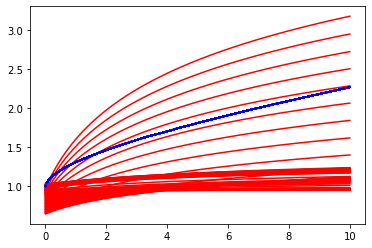

In [45]:
# initial theta
N = 100
theta = [1]*4
# gradient ascend step size 
alpha = 0.0001
# store theta
THETA = np.zeros((len(theta),N))
for i in range(N):
    if i%1 ==0:
        print(i)
        print(theta)
    theta = updateTheta(theta)
    THETA[:,i] = theta
    plot(theta)

In [46]:
thetaStar = [0.83381087, 0.5263778,  1.72872177, 0.60162327]
V(thetaStar,5)

2.954236137136398

In [47]:
V(THETA[:,1],5)

2.7368933690314106

In [48]:
V(THETA[:,90],5)

1.5481538314715222

In [49]:
np.interp(5, ws, Vs)

3.392088809767944